### Baseball Case Study
###### Project Description
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Base on balls , Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

- Output: Number of predicted wins (W)


## Importing the necessary Libraries 

In [180]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings ('ignore')

In [144]:
# reading the datasets and selecting 20 randomly samples
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
data.sample(n=20)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
15,100,647,5484,1386,288,39,137,506,1267,69,525,478,2.94,1,15,62,96
19,64,640,5571,1382,257,27,167,496,1255,134,754,700,4.33,2,8,35,90
12,85,661,5417,1331,243,21,176,435,1150,52,675,630,3.94,2,12,46,93
13,76,656,5544,1379,262,22,198,478,1336,69,726,677,4.16,6,12,45,94
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
17,97,689,5491,1341,272,30,171,567,1518,95,608,546,3.36,6,21,48,111
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92


In [145]:
# checking the data types for each column 
data.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

All columns are int64 expect that of ERA which is floar64. But generally our data type is object data. 

# Exploratory Data Analysis 

In [146]:
print('Shape   ------------>', data.shape)
print('\n','Each Column and data type and its count')
print(data.info())

Shape   ------------> (30, 17)

 Each Column and data type and its count
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB
None


According to the data info result I am obversing no nulls values, again,there are  17 columns, 16 are int64 and ERA which is float64. memory usage 4,1kb

In [147]:
# confirming nulls values 
data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<Axes: >

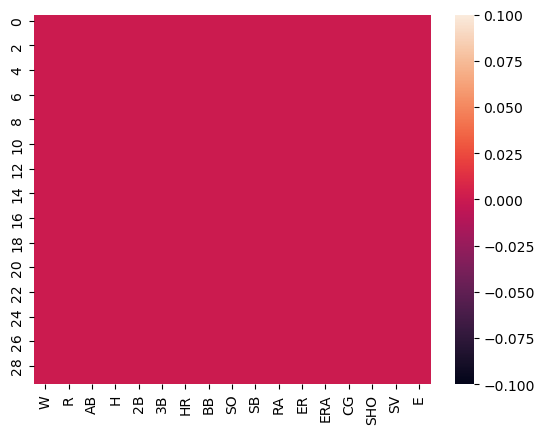

In [149]:
# Using heatmap to confirm again if there are nulls values 
sns.heatmap(data.isnull())

 Heatmap has confirmed again that there is no null value. 

In [150]:
# Checking numbers of unique values
data.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

There are 17 columns unique values 

In [151]:
# checking the values counts of each columns 

for count in data.columns:
    print(data[count].value_counts()) # Checking how many times unique values frequet in each colums
    print('\n')

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64


689    2
696    2
724    1
647    1
650    1
720    1
667    1
626    1
573    1
613    1
703    1
683    1
640    1
655    1
697    1
694    1
656    1
661    1
729    1
751    1
748    1
644    1
713    1
764    1
891    1
622    1
669    1
737    1
Name: R, dtype: int64


5485    2
5575    1
5631    1
5457    1
5649    1
5565    1
5385    1
5529    1
5420    1
5463    1
5428    1
5527    1
5571    1
5480    1
5491    1
5484    1
5467    1
5600    1
5544    1
5417    1
5459    1
5511    1
5640    1
5567    1
5509    1
5605    1
5533    1
5439    1
5572    1
Name: AB, dtype: int64


1363    2
1497    1
1386    1
1324    1
1494    1
1486    1
1346    1
1374    1
1361    1
1420    1
1351    1
1382    1
1378    1
1341    1
1462    1
1405    1
1349    1

No repeated unique values in any of the columns 

In [152]:
# Statistical summary of the dataset
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


##### Observation
This give a discriptive statistic of numerical columns for the datasets 
There is no negative or invaid values 
From the above description the fellowing observation are as fellows
The count values for each columns are same 
The Min value in CG appears to be 0.000000, also in CG column the difference between the 75% and Max is huge.




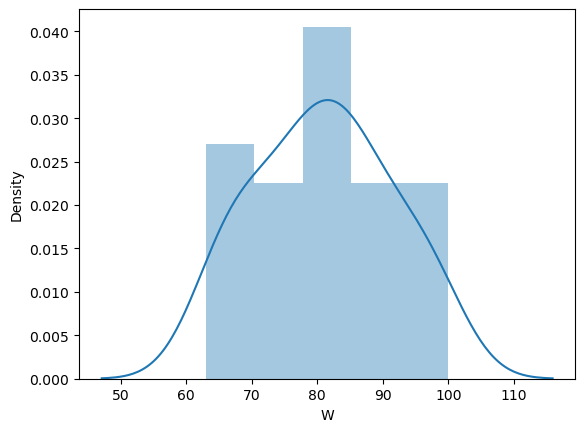

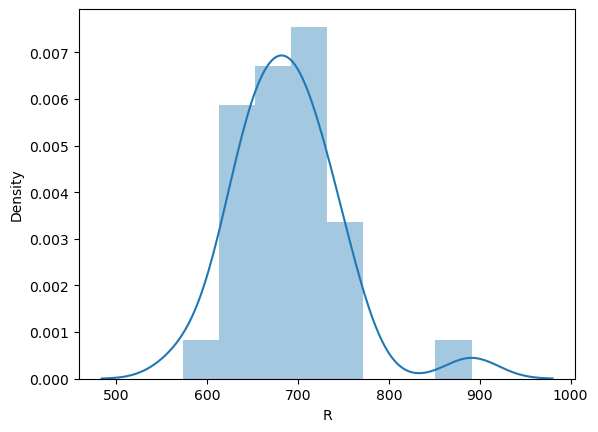

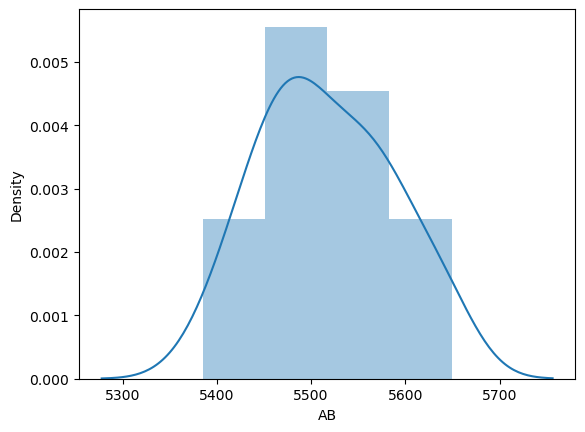

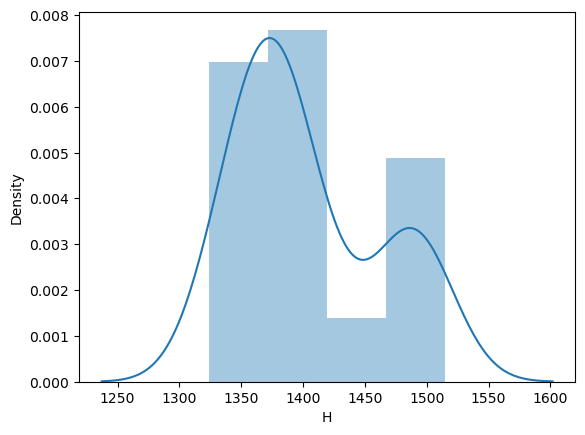

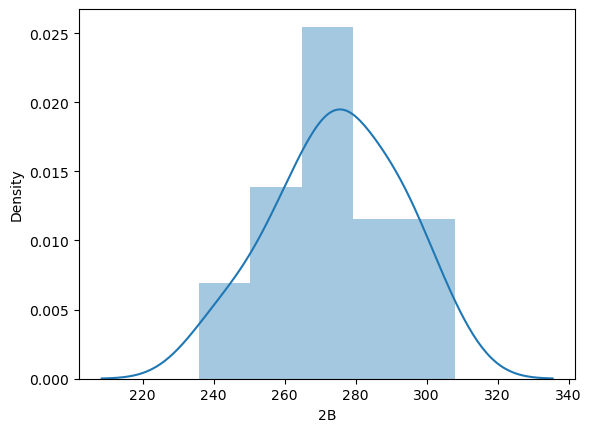

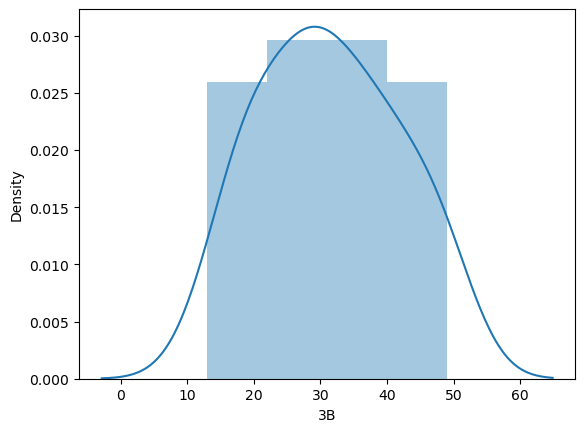

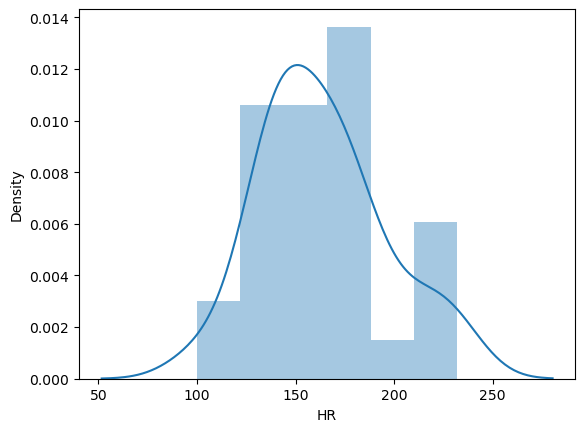

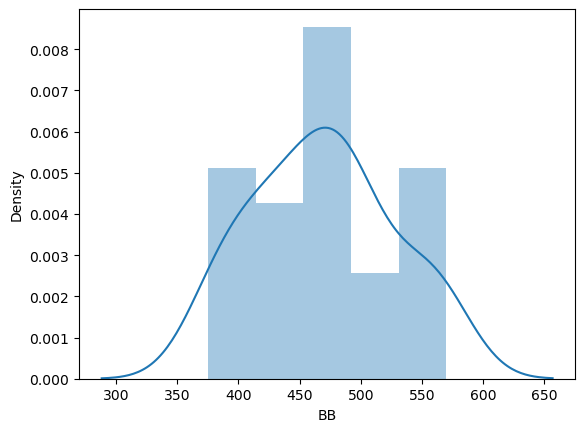

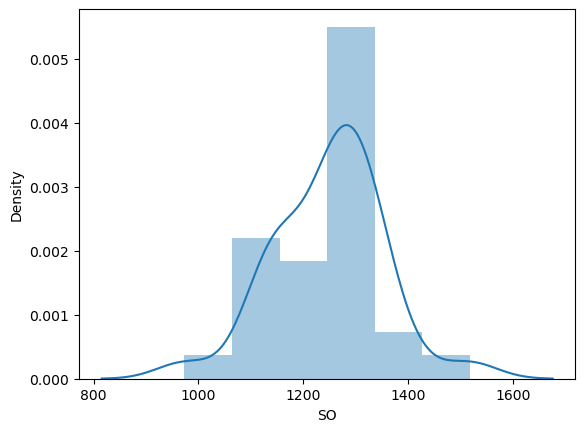

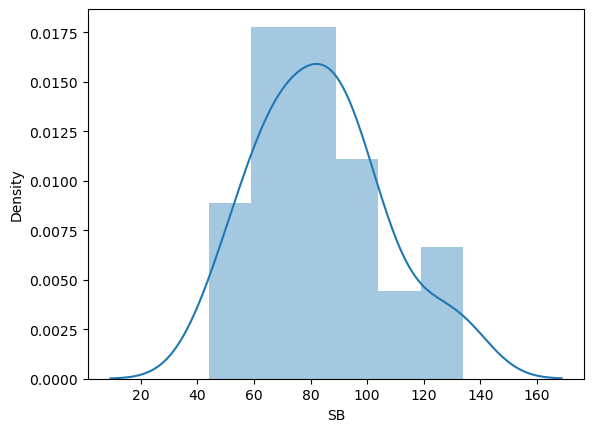

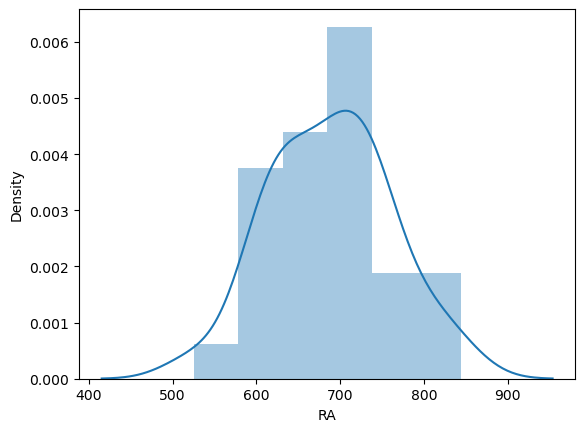

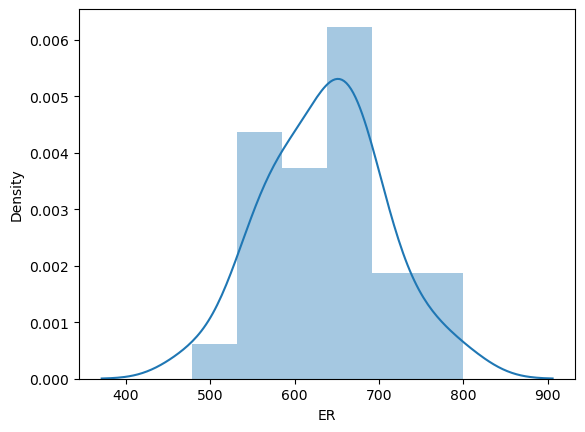

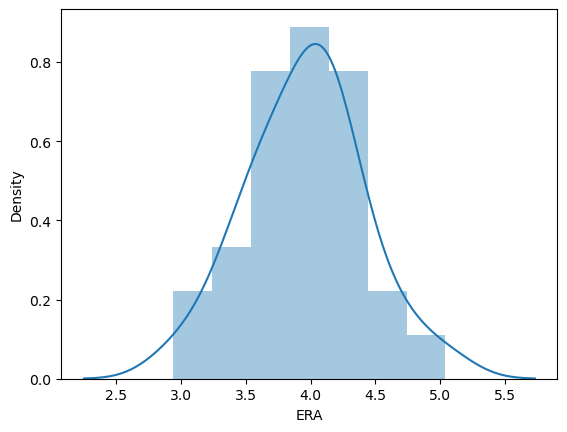

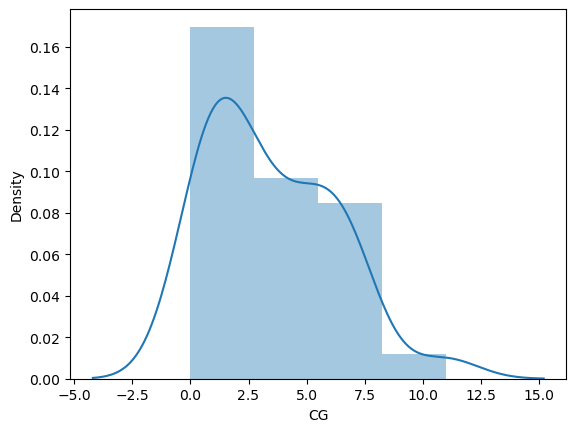

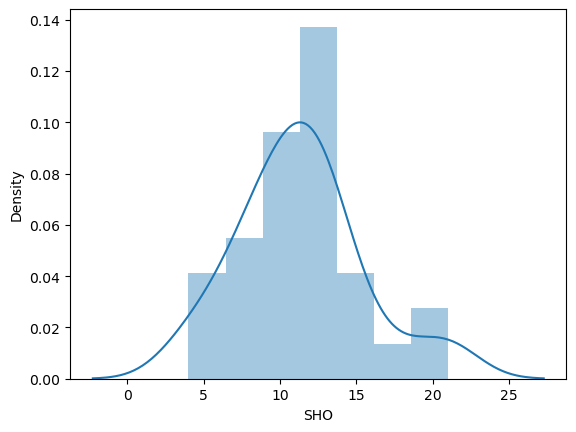

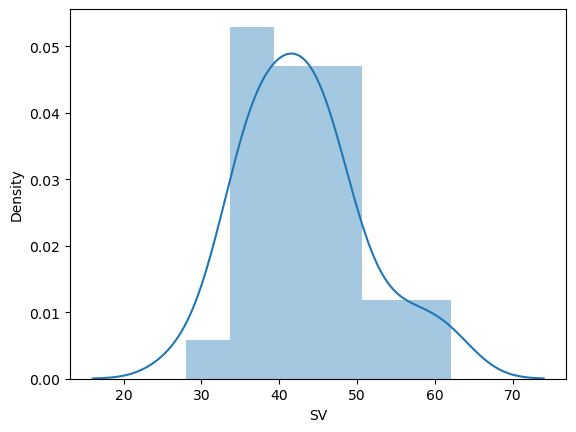

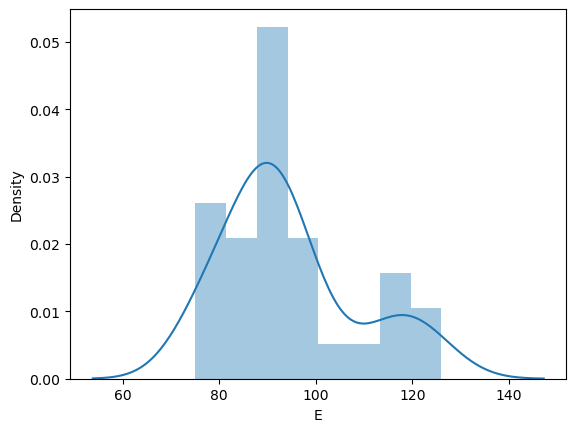

In [153]:
# Checking the Distribution of data

for i in data.columns:
    plt.figure()
    sns.distplot(data[i])

 In the above distribution plot all the columns fellow a bell shape and the data are almost normally distributed, but am observing an outliers and skewness.But before checking the outliers and skewness lets check the correlationship between features and label.

# Correlationship 

<Figure size 2500x3000 with 0 Axes>

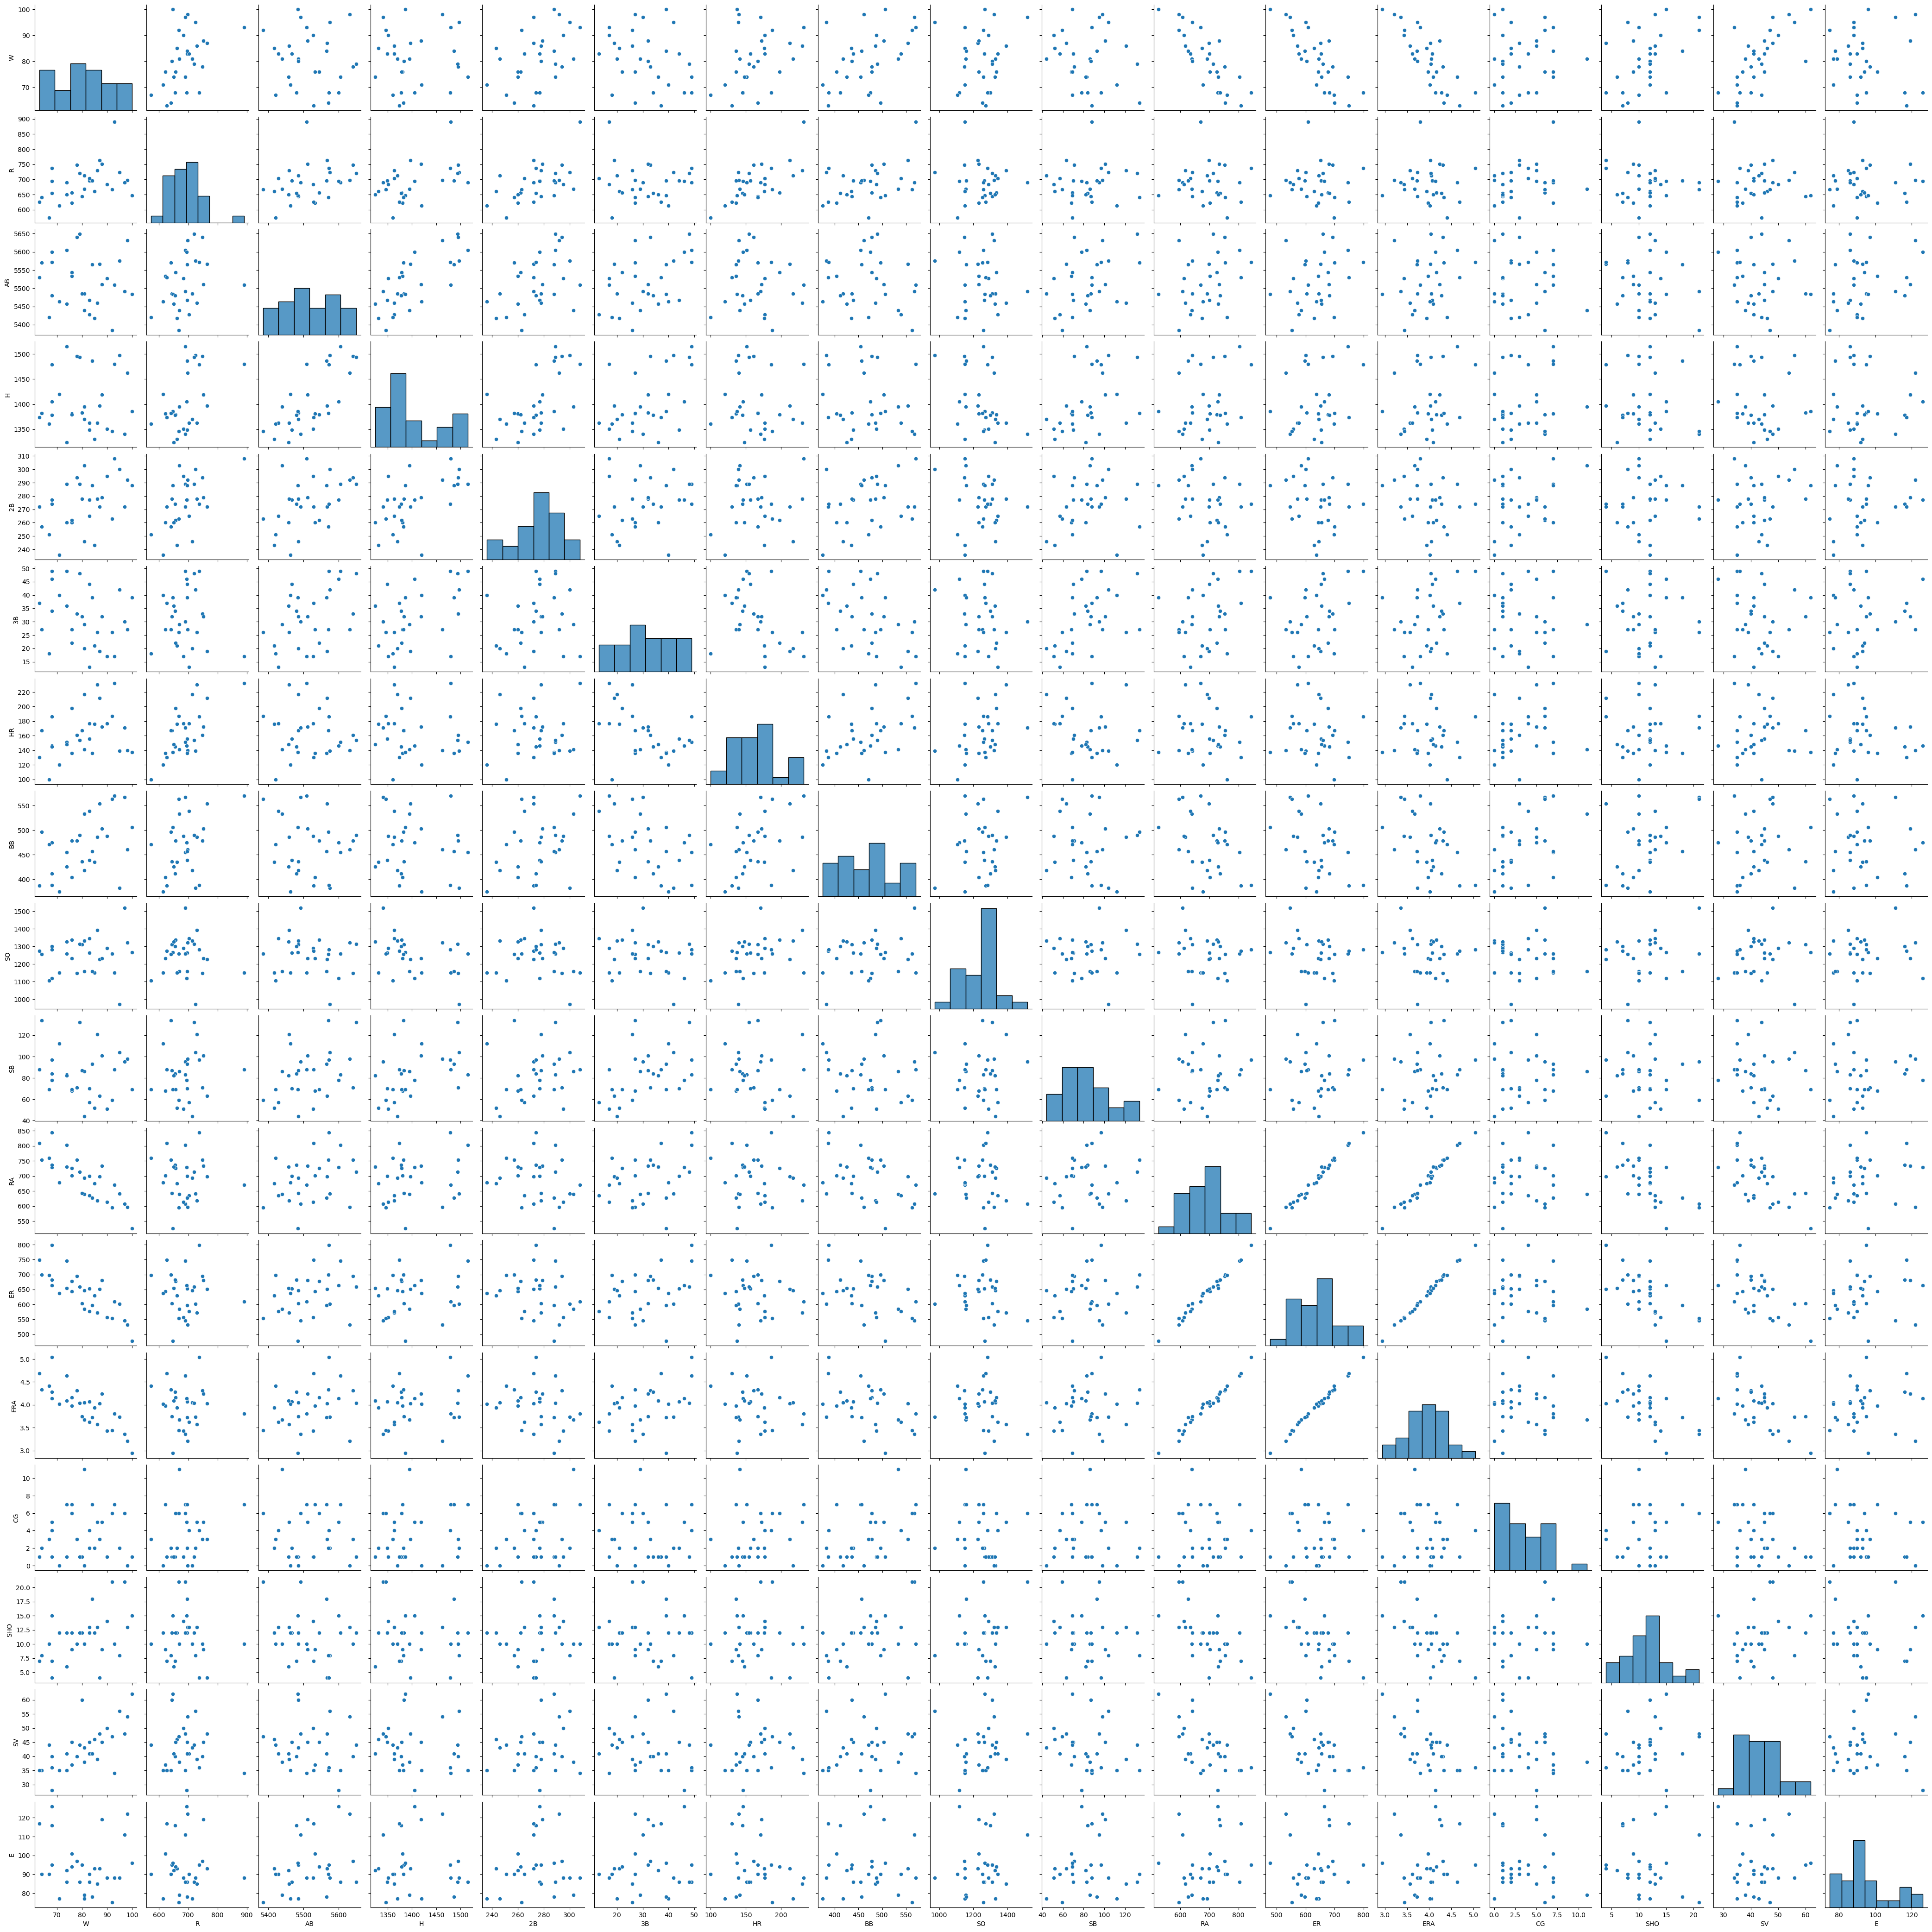

In [154]:
plt.figure(figsize=(25,30))
sns.pairplot(data=data,palette = 'dark2') 


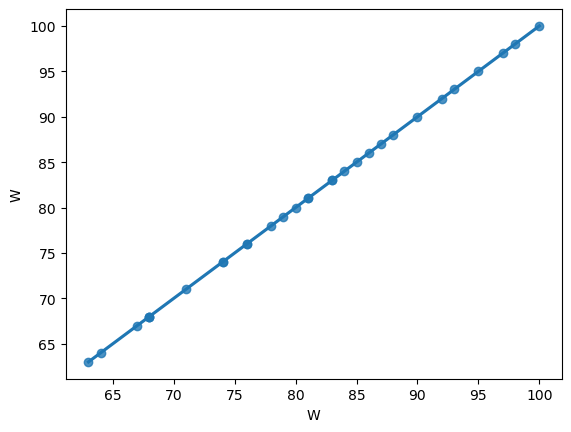

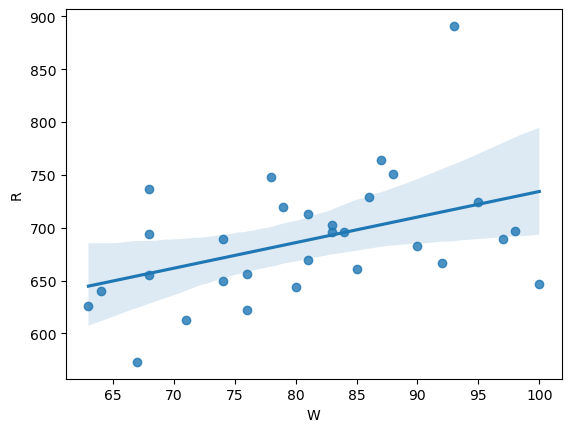

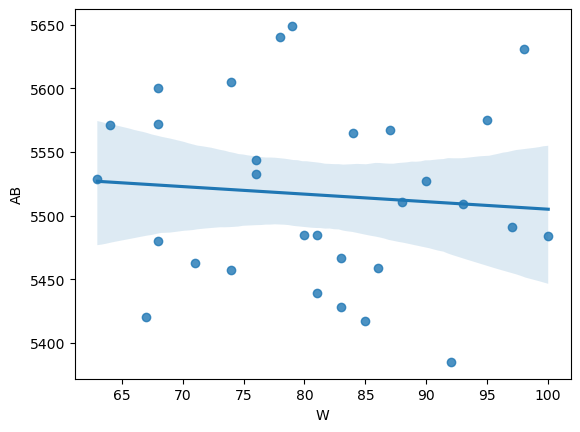

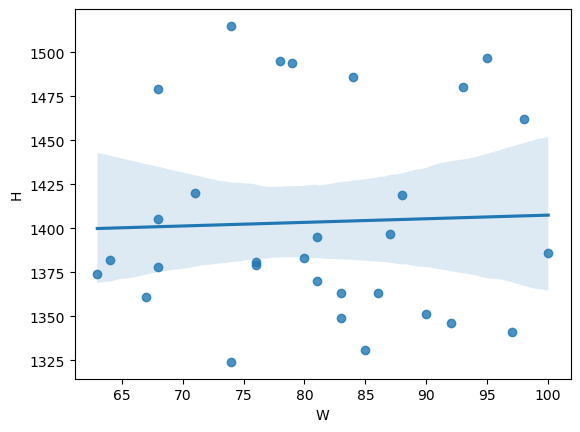

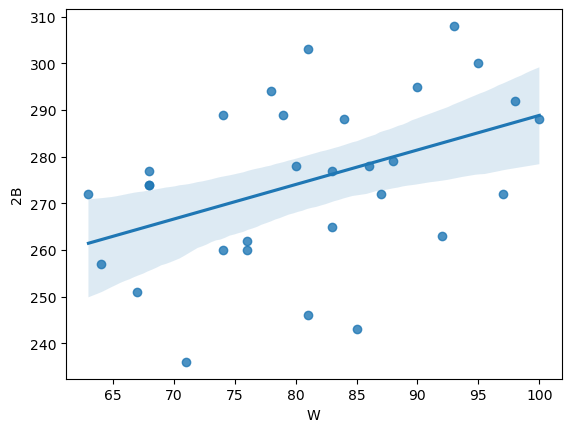

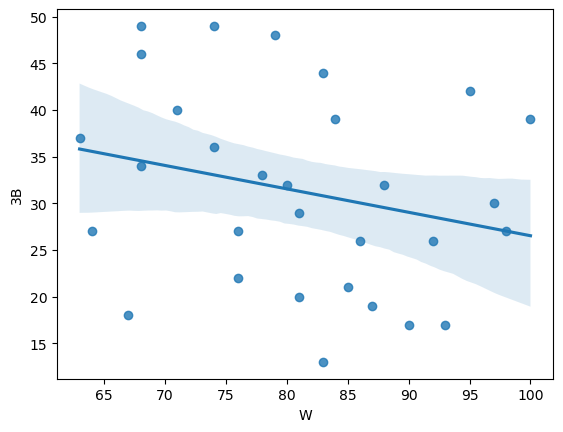

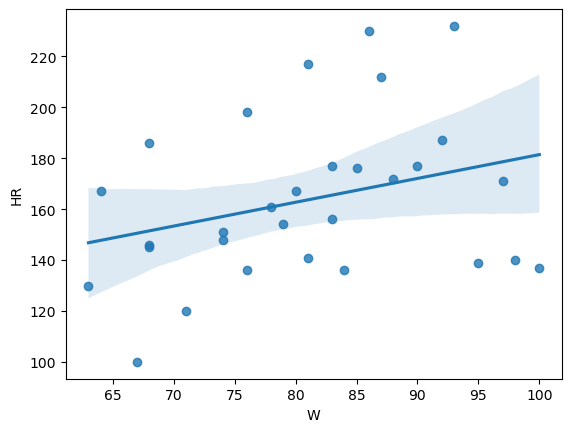

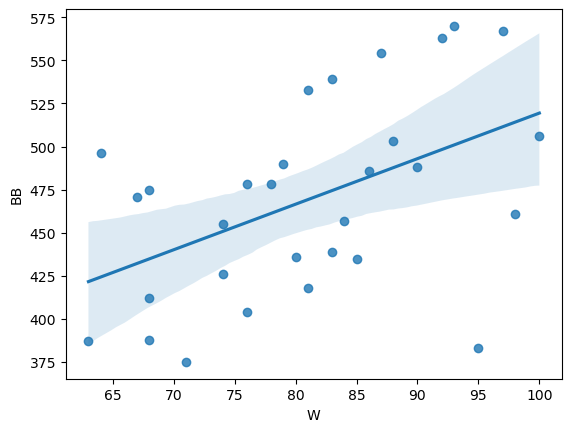

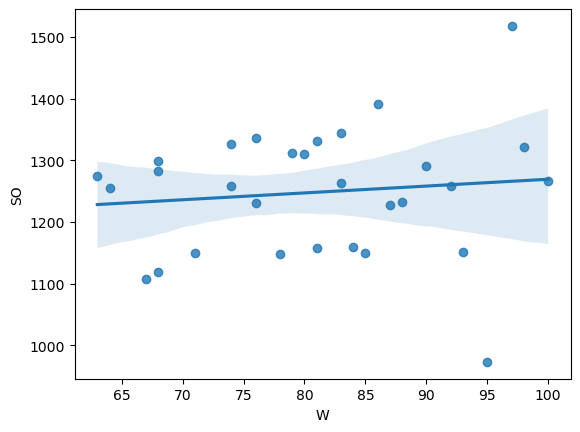

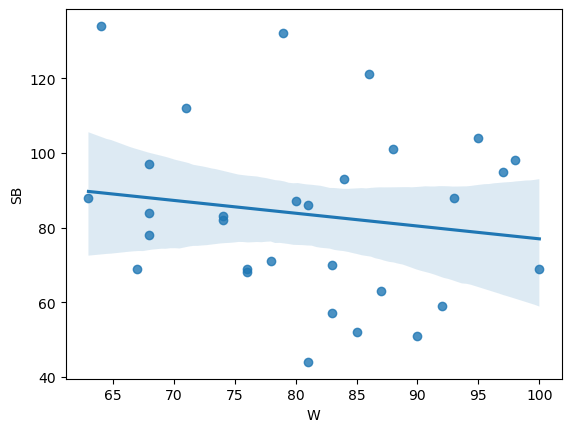

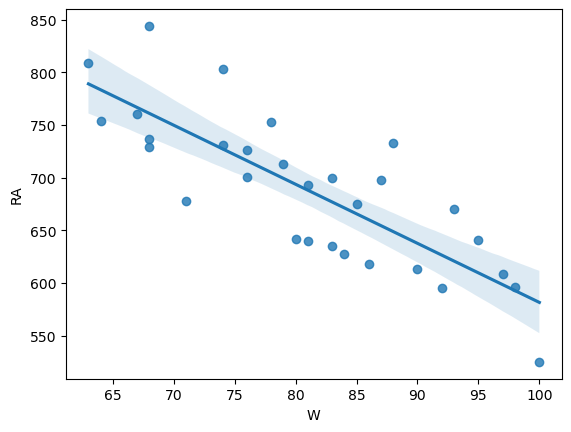

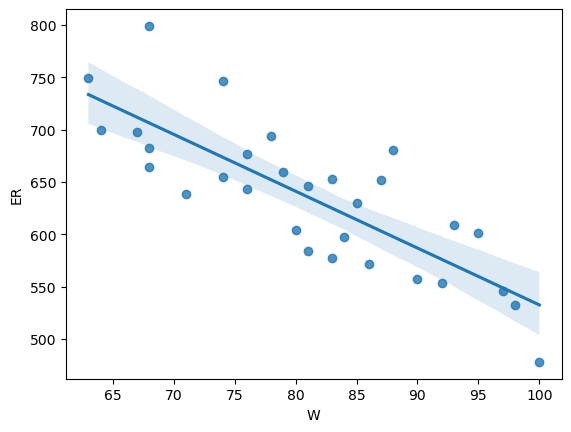

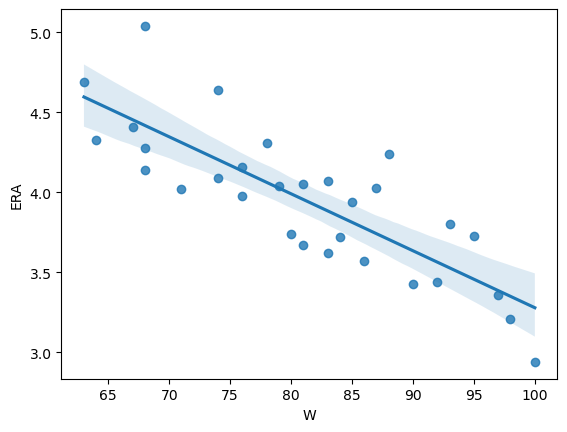

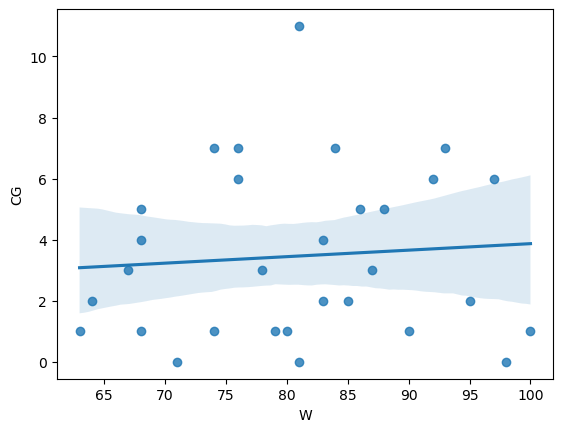

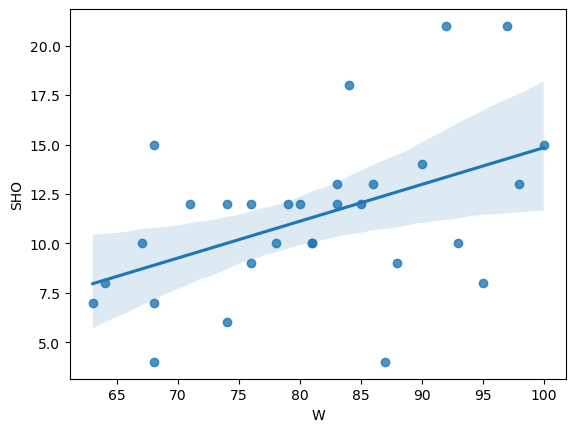

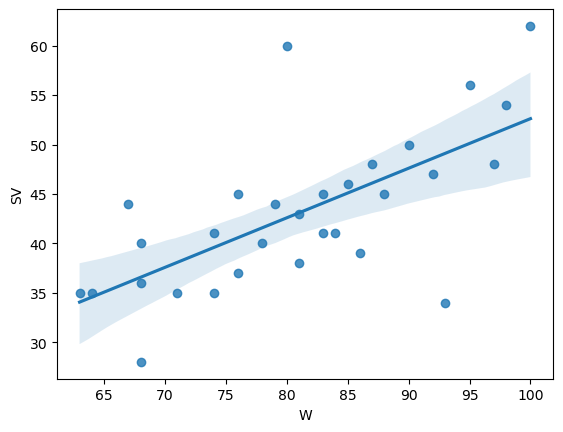

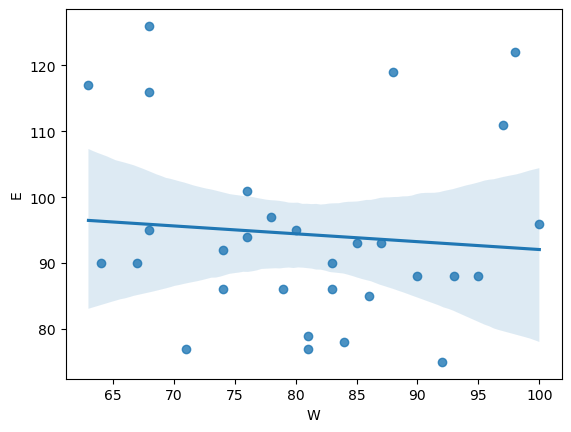

In [155]:
for i in data.columns:
    plt.figure()
    sns.regplot(x='W', y=i,data=data)
    plt.xlabel('W')
    plt.ylabel(i)

The number of home runs,runs, doubles, shutouts,saves and walks are all  strong positively linear relationship with target variable but some of the data are scatter around the best fitline 

Stolen bases, runs allowed, and earned runs are all highly negative linearly correlated with wins

The other features have less linear correlation with no of Win

# Checking Outliers 

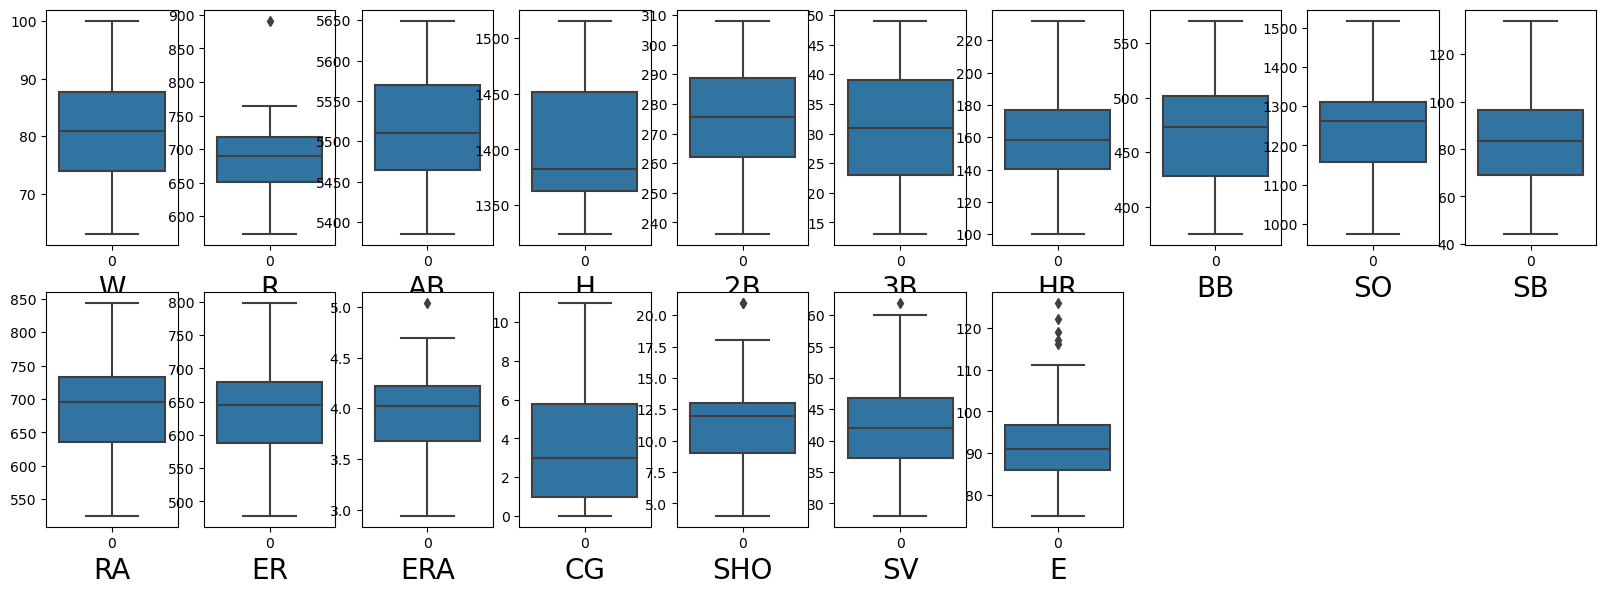

In [156]:
# Using box plot to find outliers in features 
plt.figure(figsize=(20,25))
plotnumber = 1
for column in data:
    if plotnumber <= 17:
        ax = plt.subplot(7,10,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize= 20)
    plotnumber +=1
plt.show()

The above box plot shows there are outliers in R, ERA, SHO,SV, and E columns. 
I will be using z-score to eliminate the outliers

# Using Z-Score to remove outliers

In [157]:
from scipy.stats import zscore
z=np.abs(zscore(data))
threshold=3
data1=data[(z<3).all(axis=1)]
print('Old Data Frame:', data.shape[0])
print('New Data Frame:', data1.shape[0])
print('percentage of loss of data by zscore is :',(data.shape[0]-data1.shape[0])/data.shape[0])

Old Data Frame: 30
New Data Frame: 29
percentage of loss of data by zscore is : 0.03333333333333333


After removing the outliers I lost 0.03% of my data which is less than 10% so that is fine. 

# Checking the Data Distribution after removing the outliers

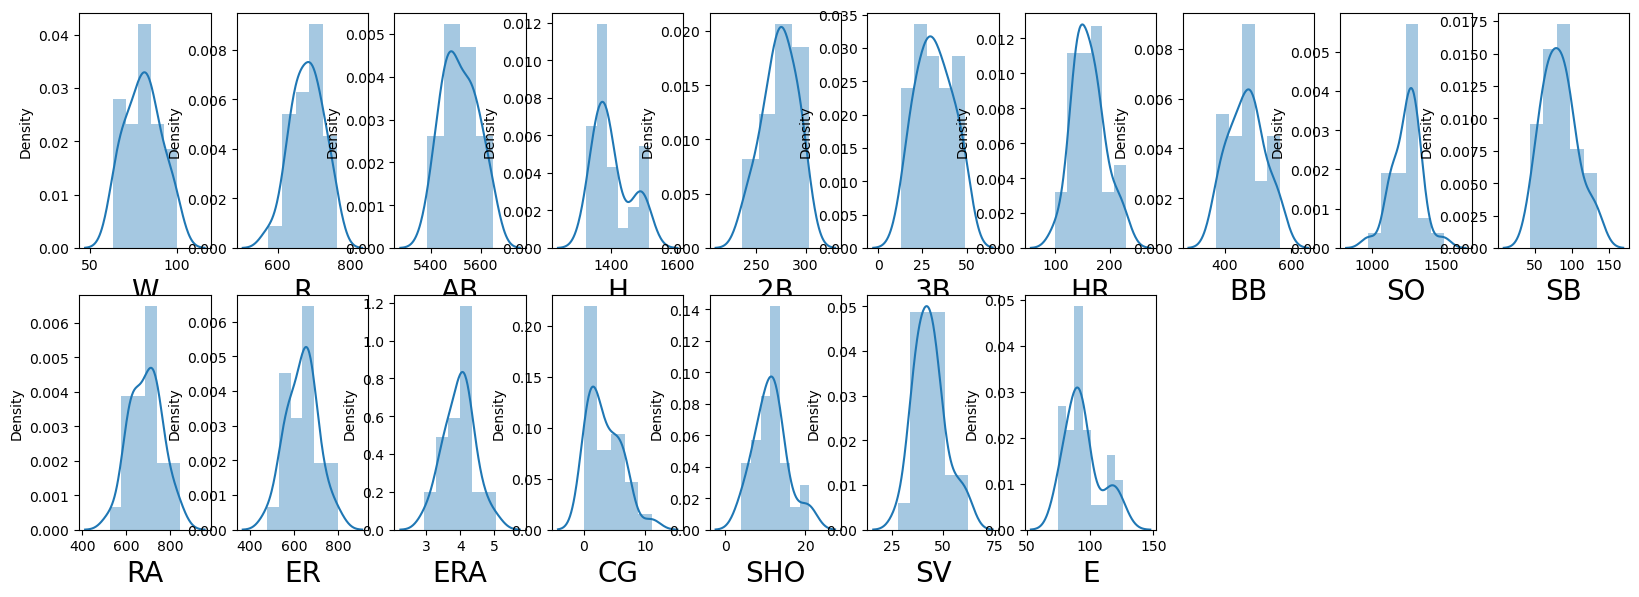

In [158]:
# ploting dist plot after outliers have been removed
plt.figure(figsize=(20,25))
plotnumber = 1
for column in data1:
    if plotnumber <= 17:
        ax = plt.subplot(7,10,plotnumber)
        sns.distplot(data1[column])
        plt.xlabel(column,fontsize= 20)
    plotnumber +=1
plt.show()

# Checking Skewness 

In [159]:
# skewness value -0.5 - 0.5 by default 
data1.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

After chekcing the skewness, I can see that  H,CG,SV, E have skewed data. So lets eliminate them. 

# Eliminating skewness using cube root 

In [160]:
data1['H'] = np.cbrt(data1['H'])
data1['CG'] = np.cbrt(data1['CG'])
data1['SV'] = np.cbrt(data1['SV'])
data1['E'] = np.cbrt(data1['E'])
print(data1.skew())

W      0.119013
R     -0.215364
AB     0.169573
H      0.753696
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -1.013981
SHO    0.526943
SV     0.280963
E      0.671748
dtype: float64


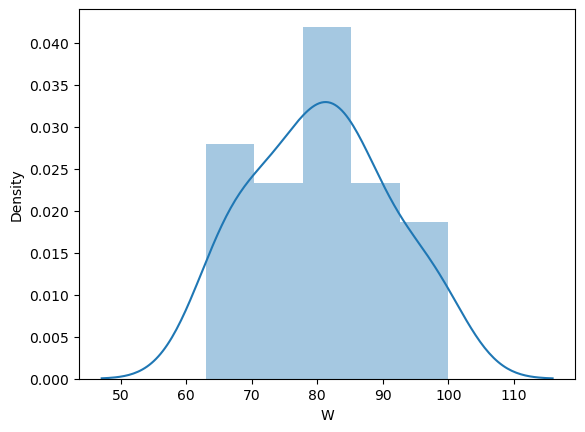

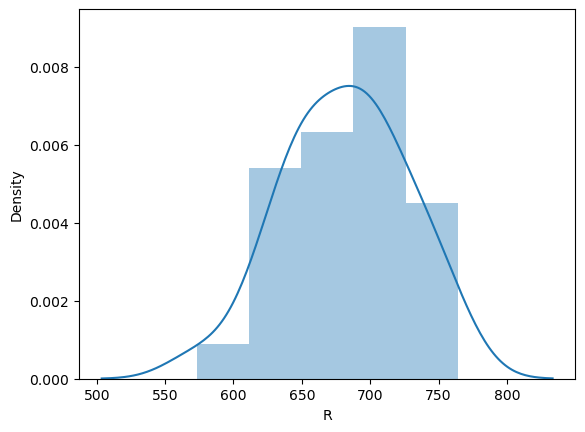

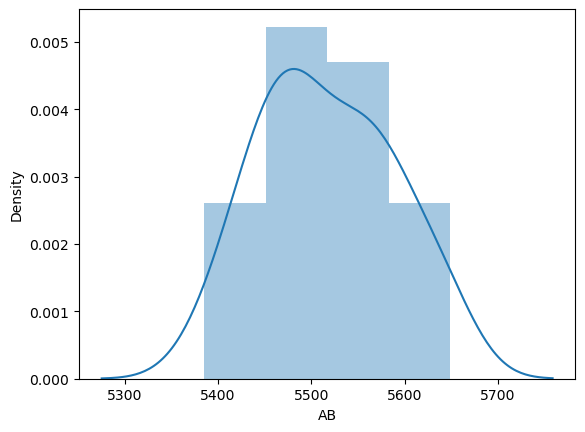

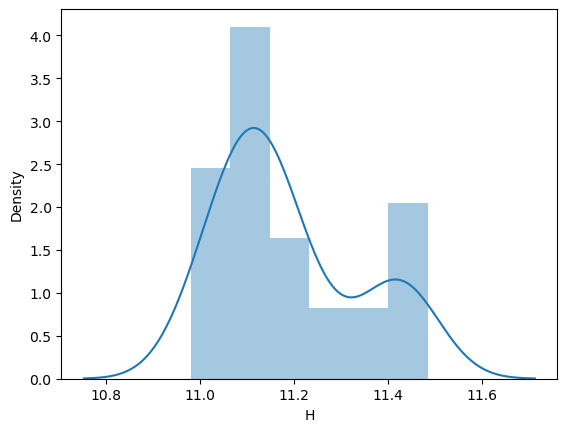

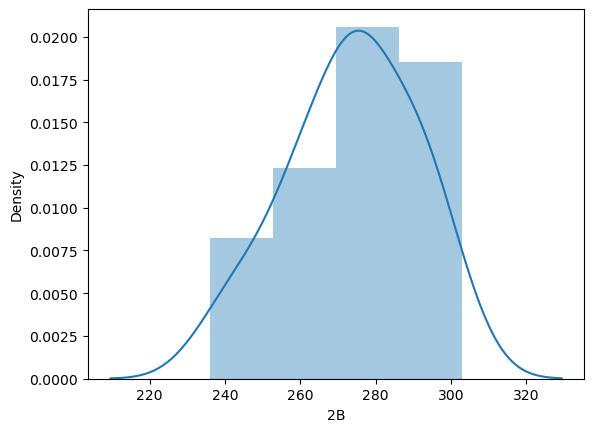

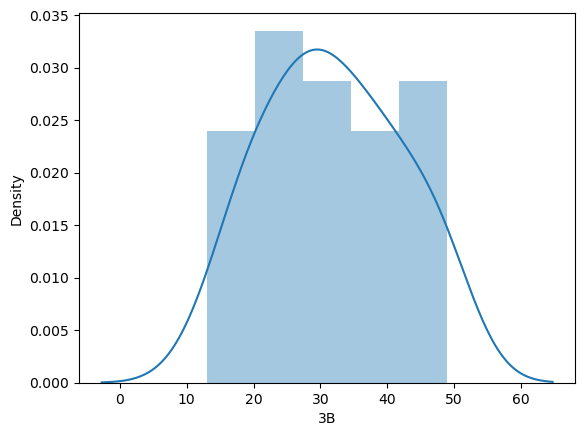

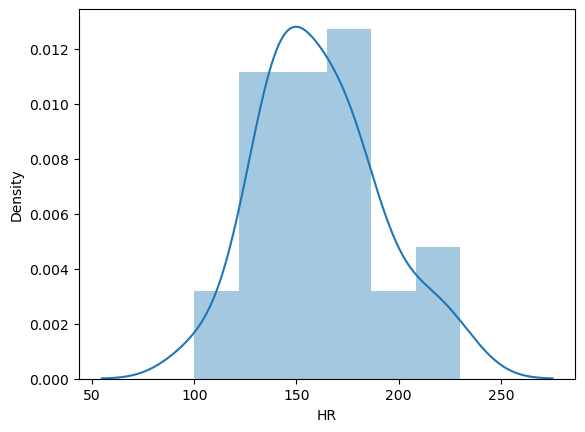

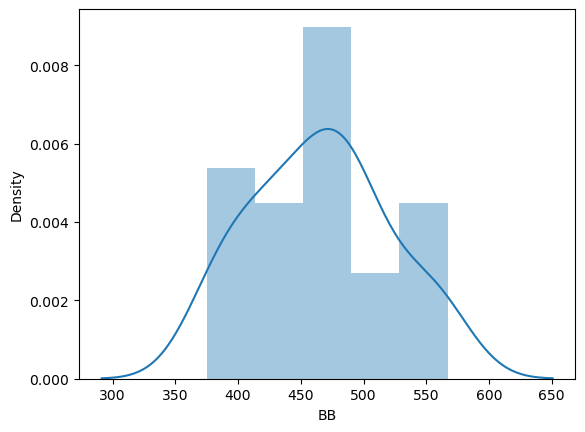

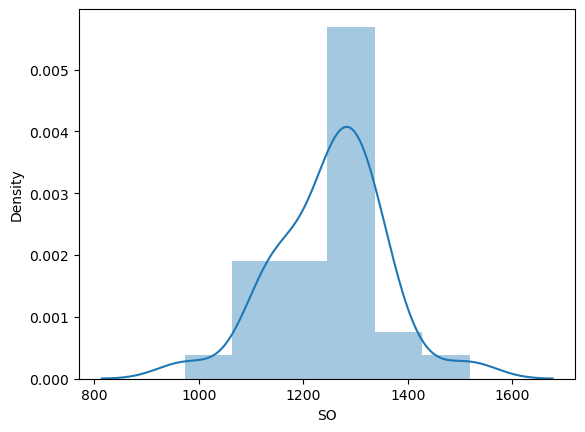

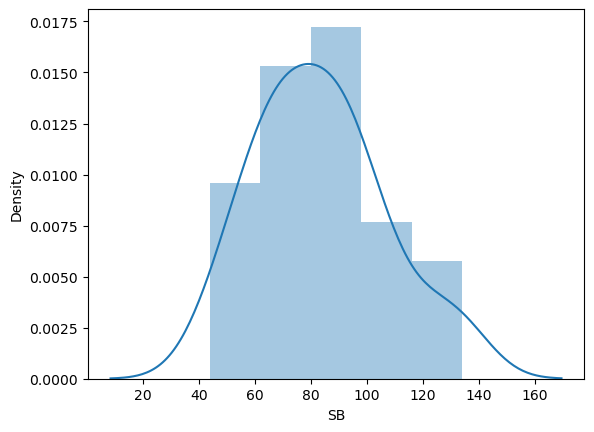

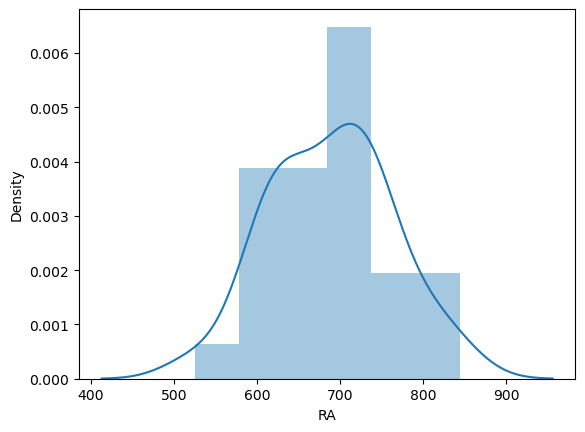

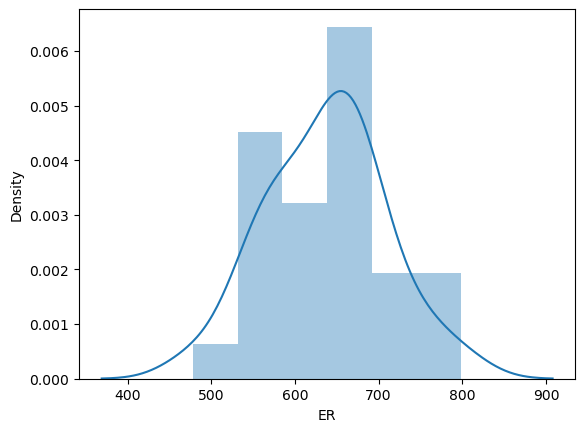

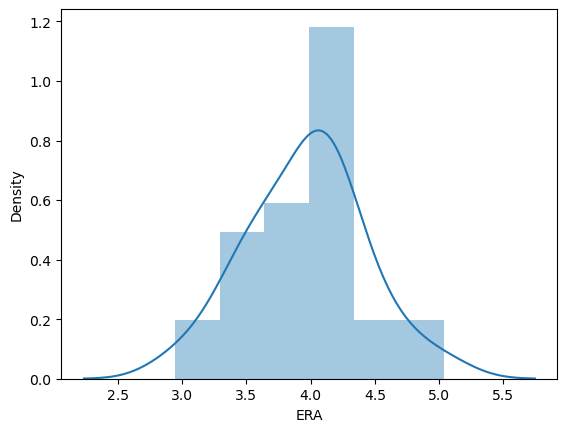

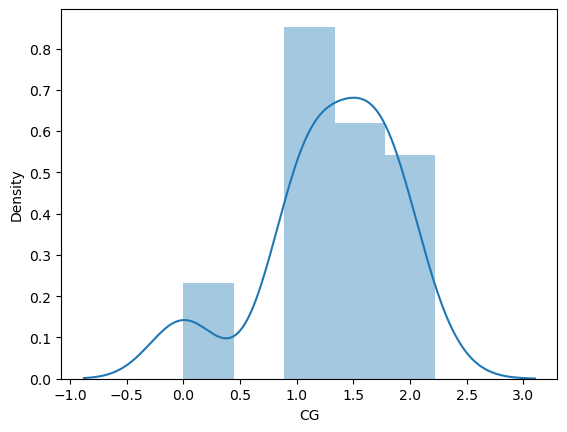

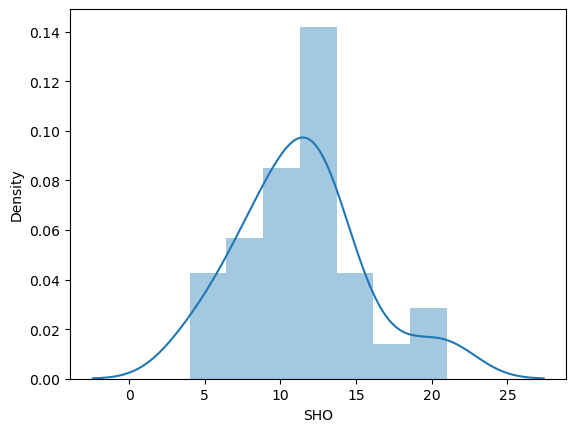

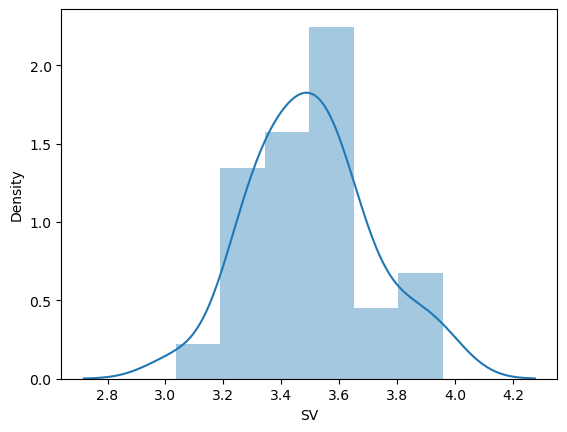

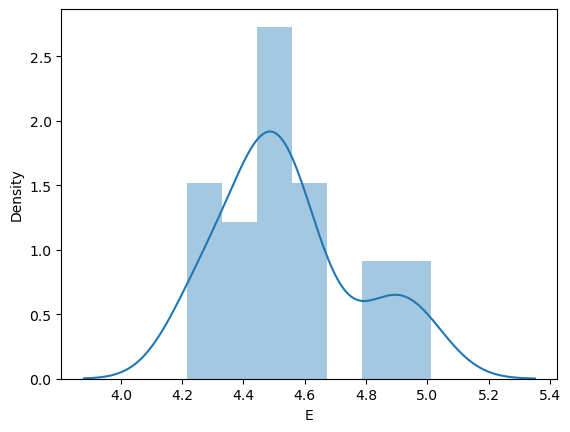

In [161]:
# checking the distribution after skewness has been removed
for i in data1.columns:
    plt.figure()
    sns.distplot(data1[i])

The data looks almost normally distributed after the skewness has been removed 

# Separating features and target (x and y)

In [162]:
x = data1.drop('W',axis=1)
y = data1.W

# Scaling the Data using Standard scalar

In [163]:
# initializing Standard Scalar
from sklearn.preprocessing import StandardScaler

In [164]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)
print(x_scaled)

[[ 0.95939835  0.83008422  1.72864714  1.55653766  1.01084549 -0.76586314
  -1.53635899 -2.72762331  0.9059529  -0.66451353 -0.51114812 -0.51138828
  -0.09467183 -0.81326172  1.58688197 -0.44822992]
 [ 0.33114717 -0.70283074 -0.94616151  0.20117132  1.20891656 -0.18138864
  -0.49502051  0.12189552 -0.58531515  0.15463823  0.23216082  0.23895226
  -0.09467183  0.15929869  0.27005039 -0.60464297]
 [-0.27466646 -1.10025314 -0.09470806  1.73332457 -0.2766165  -0.69710144
   1.25294051 -0.9258657   0.11645805 -0.67839746 -0.75415297 -0.64380131
   1.61560772 -0.32698152 -0.68423796 -1.17199438]
 [-1.32923093  0.23395062 -0.3518386  -0.8006212  -0.47468758 -0.8690057
  -1.14585706 -0.20124579 -0.6730368   0.16852216  0.08921679  0.04033271
   1.06379443 -0.57012162 -0.82990684  0.51474557]
 [ 0.17408438  1.25589393  2.04174152  0.90831897  1.70409425 -0.35329291
  -0.19749523  0.07293472 -0.01512442  1.58468284  1.56154027  1.4968761
   1.06379443  0.15929869 -1.12931506 -0.60464297]
 [ 1.85

This is how the data looks like after scaling, look great. Now I will check for multicollinearity using variance inflation factor(vif)

In [165]:
# lets check the column of the data 
x_scaled.shape[1]

16

I have 16 features been scaled

# Checking multicollinearity 

In [166]:
# Finding the features that are correlated with other features using variance inflation factor(vif)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_score = pd.DataFrame()
vif_score['vif_score'] = [variance_inflation_factor(x_scaled,i)
             for i in range(x_scaled.shape[1])]
vif_score['features'] = x.columns
print(vif_score)


      vif_score features
0      7.097438        R
1     16.824584       AB
2      8.785400        H
3      3.965512       2B
4      3.305645       3B
5      8.593125       HR
6      3.618748       BB
7      2.904880       SO
8      1.966001       SB
9    199.932990       RA
10  1844.554181       ER
11  1432.284988      ERA
12     2.753136       CG
13     3.621242      SHO
14     4.642598       SV
15     2.114030        E


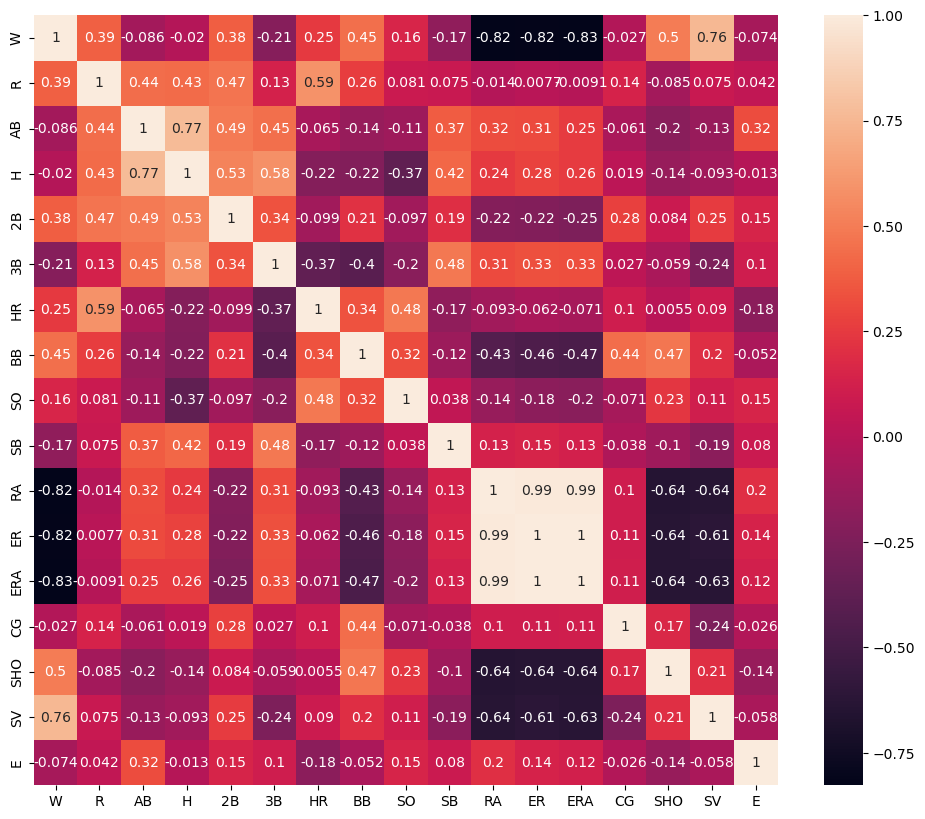

In [167]:
# Ploting the heatmap of correlation between the features
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show()

According to the result of the above heatmap I can see that AB and H highly correlated and have multicollinearity issue, also RA and ER, ER and ERA, RA and ERA. Again the heatmap has confirmed those columns have multi correlated 

In [168]:
data1.corr()['W'].sort_values()

ERA   -0.826952
RA    -0.823176
ER    -0.815308
3B    -0.206737
SB    -0.169503
AB    -0.085780
E     -0.074272
CG    -0.026520
H     -0.019968
SO     0.156469
HR     0.245697
2B     0.384886
R      0.390451
BB     0.447513
SHO    0.497526
SV     0.755967
W      1.000000
Name: W, dtype: float64

# Using SelectBest features selction method

In [169]:
from sklearn.feature_selection import SelectKBest,f_classif

In [170]:
x = data1.drop(columns=['W'],axis=1)
y = data1.W

In [193]:
print(len(x))
print(len(y))

29
29


In [178]:
best_features = SelectKBest(score_func = f_classif,k=9) # selecting 9 best columns 
fit = best_features.fit(x,y) 
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x.columns)

# Using Concatenat DataFrame
features_scores = pd.concat([df_columns,df_scores],axis=1)
features_scores.columns = ['feature_name','Score'] # Creating name for output columns 
print('\n The best 9 feature\n', features_scores.nlargest(9,'Score'))


 The best 9 feature
    feature_name     Score
8            SB  3.283197
15            E  2.814334
9            RA  2.524616
0             R  2.485509
14           SV  2.190896
11          ERA  1.732208
10           ER  1.636442
1            AB  1.622586
7            SO  1.519889


In [194]:
# Creating a new dataframe with all the best 9 features
x_new = x[['SB','E','RA','R','SV','ERA','ER','AB','SO']]
print(x_new)

     SB         E   RA    R        SV   ERA   ER    AB    SO
0   104  4.447960  641  724  3.825862  3.73  601  5575   973
1    70  4.414005  700  696  3.556893  4.07  653  5467  1264
2    86  4.290840  640  669  3.361975  3.67  584  5439  1157
3    68  4.657010  701  622  3.332222  3.98  643  5533  1231
4    83  4.414005  803  689  3.271066  4.64  746  5605  1259
6    63  4.530655  698  764  3.634241  4.03  652  5567  1227
7    44  4.254321  693  713  3.503398  4.05  646  5485  1331
8    87  4.562903  642  644  3.914868  3.74  604  5485  1310
9    71  4.594701  753  748  3.419952  4.31  694  5640  1148
10  101  4.918685  733  751  3.556893  4.24  680  5511  1233
11  121  4.396830  618  729  3.391211  3.57  572  5459  1392
12   52  4.530655  675  661  3.583048  3.94  630  5417  1150
13   69  4.546836  726  656  3.556893  4.16  677  5544  1336
14   78  5.013298  729  694  3.036589  4.14  664  5600  1119
15   69  4.578857  525  647  3.957892  2.94  478  5484  1267
16   98  4.959676  596  

In [195]:
print(len(x_new))
print(len(y))

29
29


In [196]:
x1 = x_new
y1 = y

In [197]:
# Scaling the selected features data
scalar = StandardScaler()
x1_scaled = scalar.fit_transform(x_new)


In [187]:
# Checking the vif after droping correlated features
from statsmodels.stats.outliers_influence import variance_inflation_factor
new_vif_score = pd.DataFrame()
new_vif_score['new_vif_score'] = [variance_inflation_factor(x1_scaled,i)
             for i in range(x1_scaled.shape[1])]
new_vif_score['features'] = x1.columns
print(new_vif_score)

   new_vif_score features
0       1.268326       2B
1       1.556129       3B
2      95.428199       BB
3       1.267750       SO
4       2.394514       SB
5     710.235601       CG
6     906.449980      SHO
7       4.408341       SV
8       1.430290        E


# Split Data into Train and Test

In [198]:
maxAccu=0
lm=LinearRegression()
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1_scaled,y,test_size=0.25,random_state=i)
    lm = LinearRegression()
    lm.fit(x_train, y_train)
    pred=lm.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is ',maxAccu,'on random state',maxRS)

Best accuracy is  0.9298775864817329 on random state 195


In [203]:
x_train, x_test,y_train, y_test = train_test_split(x1_scaled, y,test_size=0.25,random_state =195)
print('Preprocessing steps completed')

Preprocessing steps completed


# Model Building 

### Linear Regression 

In [204]:
# Training Model 
lrm = LinearRegression()
lrm.fit(x_train,y_train)

LinearRegression()

In [201]:
# lets use the model to predict the original data first row
data1.head(1)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,11.439506,300,42,139,383,973,104,641,601,3.73,1.259921,8,3.825862,4.44796


In [202]:
#Lets use our model to predict the chances of win by the above data.
print('Chances of win', lrm.predict(scalar.transform([[104,4.44796,641,724,3.825862,3.73,601,5575,973]])))

Chances of win [92.4499402]


In [205]:
print('LRM Train score:', lrm.score(x_train,y_train)*100) # checking model training score 
print('LRM Test Score:', lrm.score(x_test,y_test)*100) # checking model testing score 
lrm_pred = lrm.predict(x_test) # using model to predict on x_test data
print('\nMAE:',mean_absolute_error(y_test,lrm_pred))# Checking model performance and accuracy using MAE
print('MSE:', mean_squared_error(y_test,lrm_pred))# Checking model performance and accuracy using MSE
print('RMSE:', np.sqrt(mean_squared_error(y_test,lrm_pred)))# Checking model performance and accuracy using RMSE
print('R2 score:', r2_score(y_test,lrm_pred))# Checking model performance and accuracy using R2 SCORE

df_pred = pd.DataFrame({'Actual':y_test, 'Model Prediction':lrm_pred})#Creating DataFrame for Actual score and Model Prediction
df_pred.head(10)

LRM Train score: 86.29326613083698
LRM Test Score: 92.9877586481733

MAE: 3.269402511778355
MSE: 12.201299952178475
RMSE: 3.493035921970811
R2 score: 0.9298775864817329


,Actual,Model Prediction
2,81,81.557083
23,67,63.150551
24,63,59.573711
6,87,91.783860
16,98,95.409925
15,100,96.686905
13,76,79.102663
29,68,63.467295


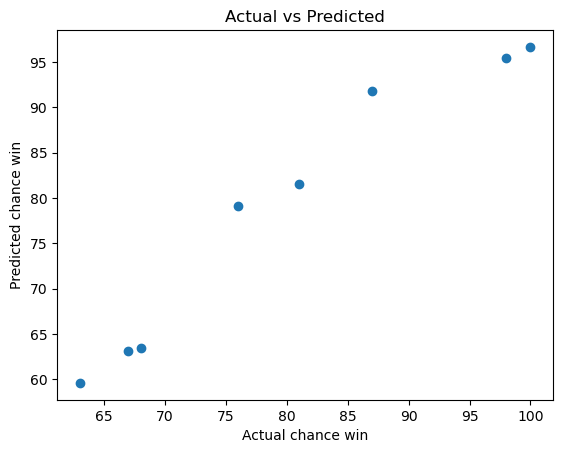

In [206]:
#Visualizing Actual chance of win  and model prediction win
plt.scatter(y_test,lrm_pred)
plt.xlabel('Actual chance win')
plt.ylabel('Predicted chance win')
plt.title('Actual vs Predicted')
plt.show()

## RandomForestRegressor 

In [207]:
rdr = RandomForestRegressor()
rdr.fit(x_train,y_train)

RandomForestRegressor()

In [208]:
print('rdr Train score:', rdr.score(x_train,y_train)*100) # checking model training score 
print('rdr Test Score:', rdr.score(x_test,y_test)*100) # checking model testing score 
rdr_pred = rdr.predict(x_test) # using model to predict on x_test data
print('\nMAE:',mean_absolute_error(y_test,rdr_pred))# Checking model performance and accuracy using MAE
print('MSE:', mean_squared_error(y_test,rdr_pred))# Checking model performance and accuracy using MSE
print('RMSE:', np.sqrt(mean_squared_error(y_test,rdr_pred)))# Checking model performance and accuracy using RMSE
print('R2 score:', r2_score(y_test,rdr_pred))# Checking model performance and accuracy using R2 SCORE

df_pred = pd.DataFrame({'Actual':y_test, 'Model Prediction':rdr_pred})#Creating DataFrame for Actual score and Model Prediction
df_pred.head(10)


rdr Train score: 94.23267947214076
rdr Test Score: 78.40905890804596

MAE: 5.13875
MSE: 37.56823750000001
RMSE: 6.129293393206105
R2 score: 0.7840905890804597


,Actual,Model Prediction
2,81,80.04
23,67,76.12
24,63,67.65
6,87,86.08
16,98,92.17
15,100,89.36
13,76,78.71
29,68,74.28


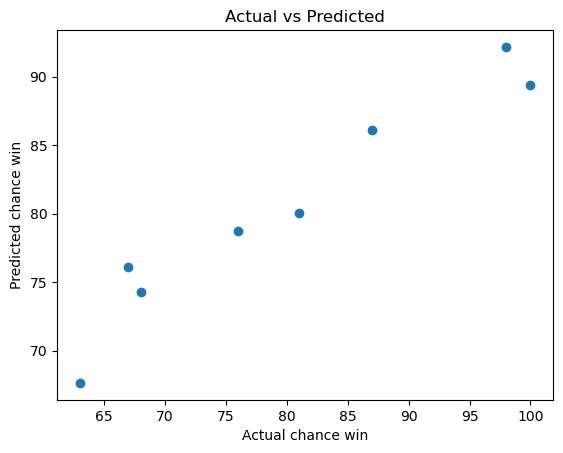

In [209]:
#Visualizing Actual chance of win  and model prediction win
plt.scatter(y_test,rdr_pred)
plt.xlabel('Actual chance win')
plt.ylabel('Predicted chance win')
plt.title('Actual vs Predicted')
plt.show()

# GradientBoostingRegressor

In [210]:
# Initializing and training model 
gdb =GradientBoostingRegressor()
gdb.fit(x_train,y_train)

GradientBoostingRegressor()

In [211]:
print('gdb Train score:', gdb.score(x_train,y_train)*100) # checking model training score 
print('gdb Test Score:', gdb.score(x_test,y_test)*100) # checking model testing score 
gdb_pred = gdb.predict(x_test) # using model to predict on x_test data
print('\nMAE:',mean_absolute_error(y_test,gdb_pred))# Checking model performance and accuracy using MAE
print('MSE:', mean_squared_error(y_test,gdb_pred))# Checking model performance and accuracy using MSE
print('RMSE:', np.sqrt(mean_squared_error(y_test,gdb_pred)))# Checking model performance and accuracy using RMSE
print('R2 score:', r2_score(y_test,gdb_pred))# Checking model performance and accuracy using R2 SCORE

df_pred = pd.DataFrame({'Actual':y_test, 'Model Prediction':gdb_pred})#Creating DataFrame for Actual score and Model Prediction
df_pred.head(10)

gdb Train score: 99.9998139554231
gdb Test Score: 82.77563855030168

MAE: 4.667631611078598
MSE: 29.970388922475088
RMSE: 5.474521798520405
R2 score: 0.8277563855030168


,Actual,Model Prediction
2,81,80.192144
23,67,75.533189
24,63,66.973327
6,87,85.136808
16,98,95.852577
15,100,91.367496
13,76,80.444371
29,68,74.939191


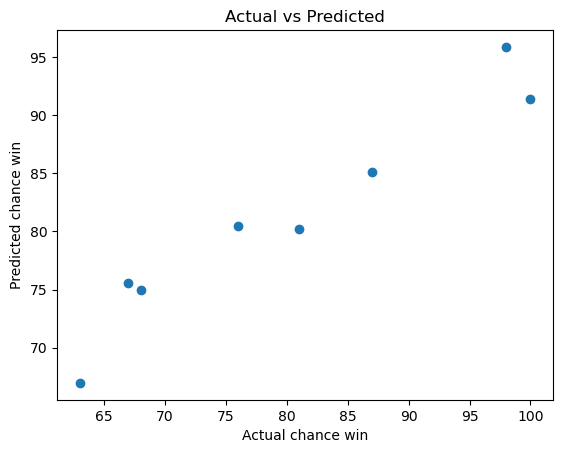

In [212]:
#Visualizing Actual chance of win  and model prediction win
plt.scatter(y_test,gdb_pred)
plt.xlabel('Actual chance win')
plt.ylabel('Predicted chance win')
plt.title('Actual vs Predicted')
plt.show()

# ExtraTreesRegressor 

In [213]:
etr = ExtraTreesRegressor() # initializing model 
etr.fit(x_train,y_train) # training model

ExtraTreesRegressor()

In [214]:
print('etr Train score:', etr.score(x_train,y_train)*100) # checking model training score 
print('etr Test Score:', etr.score(x_test,y_test)*100) # checking model testing score 
etr_pred = etr.predict(x_test) # using model to predict on x_test data
print('\nMAE:',mean_absolute_error(y_test,etr_pred))# Checking model performance and accuracy using MAE
print('MSE:', mean_squared_error(y_test,etr_pred))# Checking model performance and accuracy using MSE
print('RMSE:', np.sqrt(mean_squared_error(y_test,etr_pred)))# Checking model performance and accuracy using RMSE
print('R2 score:', r2_score(y_test,etr_pred))# Checking model performance and accuracy using R2 SCORE

df_pred = pd.DataFrame({'Actual':y_test, 'Model Prediction':etr_pred})#Creating DataFrame for Actual score and Model Prediction
df_pred.head(10)

etr Train score: 100.0
etr Test Score: 78.13614942528737

MAE: 5.282499999999999
MSE: 38.04309999999998
RMSE: 6.167908883892497
R2 score: 0.7813614942528737


,Actual,Model Prediction
2,81,82.56
23,67,77.36
24,63,70.05
6,87,84.49
16,98,95.70
15,100,91.59
13,76,78.60
29,68,75.47


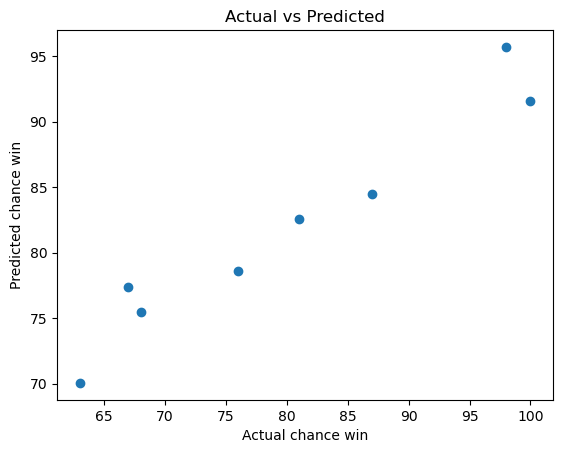

In [215]:
#Visualizing Actual chance of win  and model prediction win
plt.scatter(y_test,etr_pred)
plt.xlabel('Actual chance win')
plt.ylabel('Predicted chance win')
plt.title('Actual vs Predicted')
plt.show()

#  Support Vector Rrgressor 

In [216]:
svr = SVR()# Initializing model
svr.fit(x_train,y_train) # training model 

SVR()

In [217]:
print('svr Train score:', svr.score(x_train,y_train)*100) # checking model training score 
print('svr Test Score:', svr.score(x_test,y_test)*100) # checking model testing score 
svr_pred = svr.predict(x_test) # using model to predict on x_test data
print('\nMAE:',mean_absolute_error(y_test,svr_pred))# Checking model performance and accuracy using MAE
print('MSE:', mean_squared_error(y_test,svr_pred))# Checking model performance and accuracy using MSE
print('RMSE:', np.sqrt(mean_squared_error(y_test,svr_pred)))# Checking model performance and accuracy using RMSE
print('R2 score:', r2_score(y_test,svr_pred))# Checking model performance and accuracy using R2 SCORE

df_pred = pd.DataFrame({'Actual':y_test, 'Model Prediction':svr_pred})#Creating DataFrame for Actual score and Model Prediction
df_pred.head(10)

svr Train score: 26.962014956171863
svr Test Score: 12.05353356208424

MAE: 10.597042347860551
MSE: 153.02685160197342
RMSE: 12.370402240912517
R2 score: 0.1205353356208424


,Actual,Model Prediction
2,81,81.419210
23,67,79.433423
24,63,78.217003
6,87,80.548964
16,98,80.592854
15,100,80.854361
13,76,78.800064
29,68,78.902819


# Model Scores 

- Linear Regression : 92.9877586481733
- RandomForest Regressor : 78.40905890804596
- GradientBoostingRegressor: 82.77563855030168
- ExtraTree Regressor :78.13614942528737
- Support Vector Regressor: 12.05353356208424

Due to the accuracy of all models it happens that Linear RegressOR has the highest performance and accuracy of 92.98%




### Using LassoCV to check model accuracy and overfitting 

In [218]:

from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

In [219]:
# Lets see if our model is overfitting by using the regularization techniques 
lasscv = LassoCV(alphas = None, max_iter =10) # trying to get the learning rate 
lasscv.fit(x_train,y_train)# model get trained 

LassoCV(max_iter=10)

In [220]:
# Best alpha parameter rate 
alpha = lasscv.alpha_
print('Best parameter rate:', alpha)

Best parameter rate: 0.9627050695916863


In [221]:
# Using lasso regression to see how well our model has fitted 
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.9627050695916863)

In [222]:
print('lasso train score', lasso_reg.score(x_train,y_train))
print('lasso test score', lasso_reg.score(x_test,y_test))

lasso train score 0.787922970409667
lasso test score 0.9472087620458869


lasso test score is almost same as lrm test score: 0.94 that means our lrm is not overfitting 

# Saving Model 

In [223]:
import pickle
pickle.dump(lrm,open('chance_win_model','wb'))

In [224]:
# Open Model and Predict 
lrm_model = pickle.load(open('chance_win_model','rb'))
lrm_model.predict(x_test)

array([81.55708308, 63.15055084, 59.57371083, 91.78386032, 95.40992485,
       96.6869045 , 79.10266252, 63.4672948 ])